### 6.8 Evaluation for difference between average

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ararabo\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\ararabo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._con

In [3]:
file_beer_sales_ab=pd.read_csv('./data/2-6-1-beer-sales-ab.csv')
# listにまとめる
file_beer_sales_ab.head(3)

,sales,beer_name
0,87.47,A
1,103.67,A
2,83.29,A


In [11]:
beer_A=file_beer_sales_ab.loc[file_beer_sales_ab['beer_name']=='A']['sales']
beer_B=file_beer_sales_ab.loc[file_beer_sales_ab['beer_name']=='B']['sales']

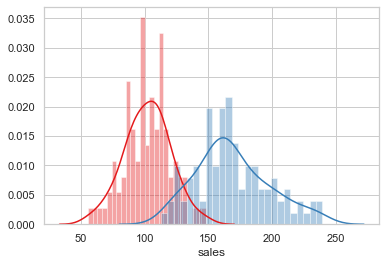

In [24]:
# ヒストグラムの作成
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
ax = sns.distplot(beer_A,bins=20)
ax = sns.distplot(beer_B,bins=20)
ax.set_xlabel('sales')
plt.show()

In [32]:
with pm.Model() as model:
    sales_a=pm.Data('sales_a',beer_A)
    sales_b=pm.Data('sales_b',beer_B)
    mu_a = pm.Uniform('mu_a', 0, 200)
    mu_b = pm.Uniform('mu_b', 0, 200)
    sigma_a = pm.Uniform('sigma_a',  0, 100)
    sigma_b = pm.Uniform('sigma_b',  0, 100)
    pm.Normal('sales_A', mu=mu_a, sigma=sigma_a, observed=sales_a)
    pm.Normal('sales_B', mu=mu_b, sigma=sigma_b, observed=sales_b)
    delta_prob = pm.Deterministic('diff_prob', mu_b - mu_a)
with model:
    trace = pm.sample(start=pm.find_MAP(), step=pm.NUTS(), n_init=1000,tune=1000, chains=4, random_seed=1)

logp = -928.31, ||grad|| = 36.555: 100%|██████████████████████████████████████████████| 18/18 [00:00<00:00, 110.73it/s]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_b, sigma_a, mu_b, mu_a]
Sampling 4 chains, 0 divergences: 100%|█████████████████████████████████████████| 6000/6000 [01:24<00:00, 70.78draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000245A7990748>],
      dtype=object)

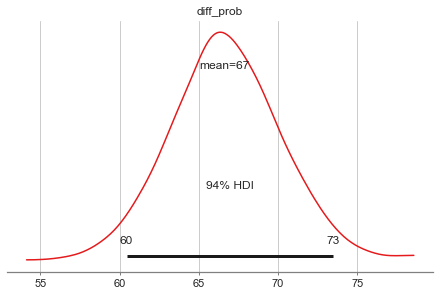

In [33]:
pm.plot_posterior(trace,var_names='diff_prob')